In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_image(image1,image2,title1='original image',title2='new_image'):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image1,cmap='gray')
    plt.title(title1)
    plt.subplot(1,2,2)
    plt.imshow(image2,cmap='gray')
    plt.title(title2)
    plt.show()

### Geometric Transformations
- Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.
#### Scaling
- we can resize an image using the function resize() from cv2 module for this purpose.You can specify the scaling factor or the size of the image.


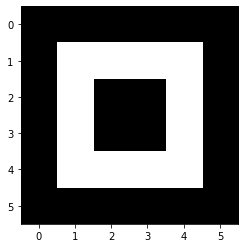

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [3]:
toy_image=np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

## Rescale along specific axis
 - fx: scale factor along the horizontal axis
 - fy: scale factor along the vertical axis
- The parameter interpolation estimates pixel values based on neighboring pixels. INTER_NEAREST uses the nearest pixel and INTER_CUBIC uses several pixels near the pixel value we would like to estimate.

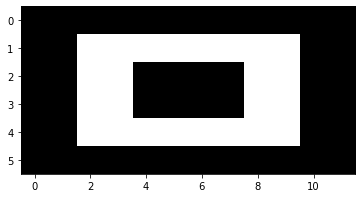

In [4]:
new_toy=cv2.resize(toy_image,None,fx=2,fy=1,interpolation=cv2.INTER_NEAREST)
plt.imshow(new_toy,cmap='gray')
plt.show()

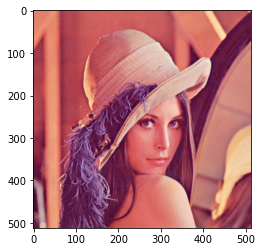

In [5]:
image=cv2.imread('lenna.png')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

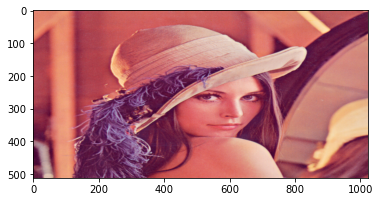

old image shape: (512, 512, 3) new image shape (512, 1024, 3)


In [6]:
new_image=cv2.resize(image,None, fx=2,fy=1,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()
print('old image shape:',image.shape,'new image shape',new_image.shape)

                     

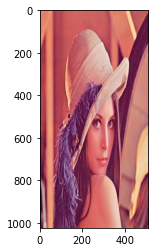

old image shape: (512, 512, 3) new image shape (1024, 512, 3)


In [7]:
new_image=cv2.resize(image,None, fx=1,fy=2,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()
print('old image shape:',image.shape,'new image shape',new_image.shape)

                     

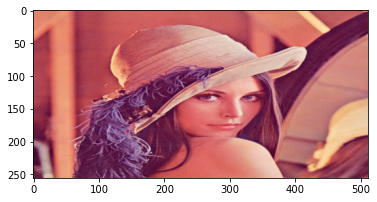

old image shape (512, 512, 3) new image shape (256, 512, 3)


In [8]:
new_image=cv2.resize(image,None,fx=1,fy=0.5,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()
print('old image shape',image.shape,'new image shape',new_image.shape)

In [9]:
# we can also specify the number of rows and columns
rows=100
columns=200


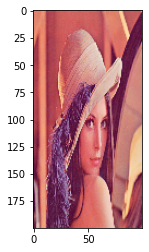

old image shape (512, 512, 3) new image shape (200, 100, 3)


In [10]:
new_image=cv2.resize(image,(100,200),interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()
print('old image shape',image.shape,'new image shape',new_image.shape)

### Translation
- Translation is when you shift the location of the image. tx is the number of pixel tou shift the location in the horizontal direction and ty is the number of pixels you shift in the vertical direction. You can create the transformation matrix M to shift the image.

In [11]:
tx=100
ty=0
M=np.float32([[1,0,tx],[0,1,ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [13]:
rows,cols,_=image.shape
rows
cols

512

- we use the function warpAffine from the cv2 module. The first input parameter is the image array, the second input parameter is the trasformation matrix M, and the final parameter is the length and width of the output image.(cols,rows)

In [14]:
new_image=cv2.warpAffine(image,M,(cols,rows))

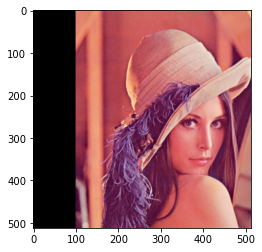

In [15]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

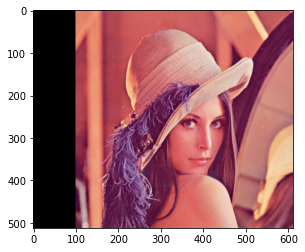

In [19]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows+ty ))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

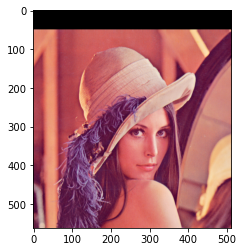

In [20]:
tx=0
ty=50
M=np.float32([[1,0,tx],[0,1,ty]])
new_image=cv2.warpAffine(image,M,(cols+tx,rows+ty))
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
theta=45.0
M=cv2.getRotationMatrix2D(center=(3,3),angle=theta,scale=1)
new_toy_image=cv2.warpAffine(toy_image,M,(6,6))

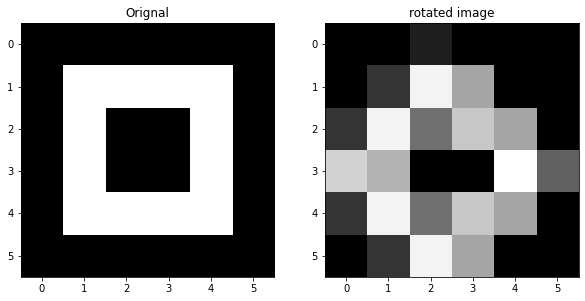

In [24]:
plot_image(toy_image, new_toy_image, title1="Orignal", title2="rotated image")